In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.0 MB/s eta 0:00:00


In [2]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RnVwPCB8UgjXPHrFvLlO")
project = rf.workspace("spyrobot").project("fire-smoke-and-human-detector-2")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Smoke-and-Human-Detector-2-1 in yolov8:: 100%|██████████| 19510/19510 [00:02<00:00, 8756.34it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


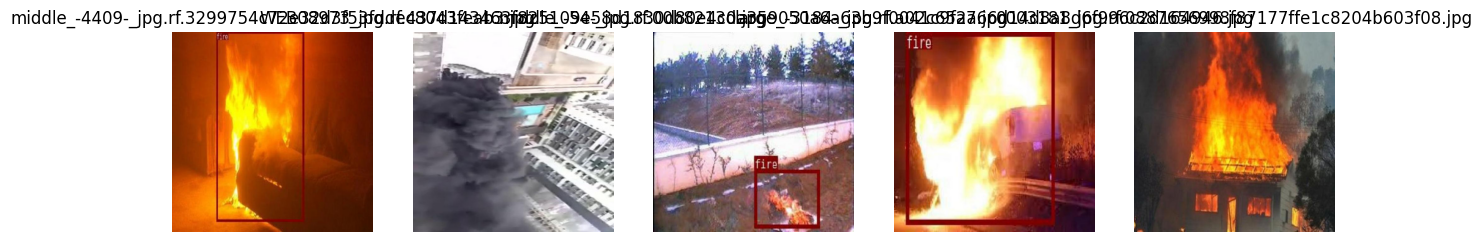

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the images directory
image_dir = "/kaggle/working/Fire-Smoke-and-Human-Detector-2-1/train/images"  # Update with your directory path

# Get a list of all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Ensure there are enough images for random sampling, otherwise sample all
sample_size = min(5, len(image_files))  # Sample up to 5 images, or fewer if there aren't enough

# Display the random images
random_images = random.sample(image_files, sample_size)

# Display images
image_paths = [os.path.join(image_dir, img) for img in random_images]
images = [Image.open(img_path) for img_path in image_paths]

# Show the images
fig, axes = plt.subplots(1, sample_size, figsize=(15, 5))
for ax, img, img_path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.show()


In [4]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO("yolov8n.pt")  # 'yolov8n.pt' is the smallest YOLOv8 model; consider 'yolov8s.pt' for larger capacity.

# Train the model with specified parameters
results = model.train(
    data="/kaggle/working/Fire-Smoke-and-Human-Detector-2-1/data.yaml",  # Adjust path to your data.yaml file
    epochs=100,                      # Number of epochs
    imgsz=640,                      # Image size (e.g., 640x640)
    batch=16,                       # Batch size; adjust according to available GPU memory
    project="yolov8-kaggle-training",  # Directory name to store results
    name="fire_smoke_detection",    # Experiment name
    cache=True                      # Cache images in memory for faster training
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 196MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Fire-Smoke-and-Human-Detector-2-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=yolov8-kaggle-training, name=fire_smoke_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
2024-12-13 04:20:31,867	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-13 04:20:32,595	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 207MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/train/labels... 8001 images, 819 backgrounds, 0 corrupt: 100%|██████████| 8001/8001 [00:06<00:00, 1260.30it/s]


train: New cache created: /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 19907. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (9.2GB RAM): 100%|██████████| 8001/8001 [00:09<00:00, 863.69it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/valid/labels... 1017 images, 74 backgrounds, 0 corrupt: 100%|██████████| 1017/1017 [00:01<00:00, 913.82it/s]


val: New cache created: /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.2GB RAM): 100%|██████████| 1017/1017 [00:01<00:00, 668.34it/s]


Plotting labels to yolov8-kaggle-training/fire_smoke_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolov8-kaggle-training/fire_smoke_detection
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.4G     0.8615      1.885      1.139          1        640: 100%|██████████| 501/501 [01:33<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]


                   all       1017       2882      0.645      0.502      0.532       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G     0.6916      1.077      1.036          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]


                   all       1017       2882      0.661      0.606      0.611       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.36G     0.7254     0.9656      1.058          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.86it/s]


                   all       1017       2882      0.639      0.568      0.586      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.36G     0.7197     0.8742       1.06          8        640: 100%|██████████| 501/501 [01:28<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all       1017       2882      0.697      0.562      0.587      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.34G     0.6653     0.7608      1.035          5        640: 100%|██████████| 501/501 [01:29<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.67it/s]

                   all       1017       2882      0.674       0.57      0.592      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.35G     0.6344     0.7054      1.029          2        640: 100%|██████████| 501/501 [01:29<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.77it/s]

                   all       1017       2882      0.685      0.649      0.642      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.35G     0.6064      0.659      1.013          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.65it/s]


                   all       1017       2882      0.657      0.621      0.629       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.35G     0.5742     0.6234          1          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.80it/s]

                   all       1017       2882      0.712      0.651      0.655       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.34G     0.5505     0.5933     0.9888          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]

                   all       1017       2882      0.675       0.65      0.665      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.35G     0.5407     0.5805     0.9865          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1017       2882      0.736      0.663      0.679      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.35G     0.5338     0.5639      0.983          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]

                   all       1017       2882      0.718      0.659      0.677      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.35G      0.511     0.5493     0.9757          5        640: 100%|██████████| 501/501 [01:30<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.76it/s]

                   all       1017       2882      0.747      0.667      0.692      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.34G     0.5028     0.5324     0.9685          6        640: 100%|██████████| 501/501 [01:29<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]

                   all       1017       2882      0.806      0.659      0.699      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.35G      0.492     0.5239     0.9636          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all       1017       2882      0.772      0.641      0.678      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.39G     0.5005     0.5243     0.9693          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.69it/s]


                   all       1017       2882      0.754       0.69      0.712      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.35G     0.4816     0.5121     0.9623          7        640: 100%|██████████| 501/501 [01:29<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]

                   all       1017       2882      0.765      0.658      0.692      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.34G     0.4779     0.5091      0.962          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]

                   all       1017       2882      0.765       0.69      0.715       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.35G     0.4696     0.4919     0.9558          4        640: 100%|██████████| 501/501 [01:29<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       1017       2882       0.76      0.695      0.704      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.35G     0.4531     0.4748     0.9499          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all       1017       2882      0.739      0.712       0.71      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.35G     0.4585     0.4857     0.9545          5        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all       1017       2882      0.772      0.706      0.709      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.34G     0.4514     0.4739     0.9497          8        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1017       2882      0.778      0.718      0.745      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.35G     0.4382     0.4608     0.9447          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.64it/s]

                   all       1017       2882       0.82       0.68      0.724      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.35G     0.4411     0.4656     0.9483          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.59it/s]

                   all       1017       2882      0.769      0.718      0.728      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.35G       0.43      0.455     0.9401          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.62it/s]

                   all       1017       2882      0.772      0.719       0.74      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.34G     0.4311     0.4473     0.9429          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]

                   all       1017       2882      0.809        0.7      0.736      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.35G     0.4237     0.4455     0.9409          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1017       2882      0.781       0.71      0.728      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.35G     0.4198     0.4432     0.9393          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       1017       2882      0.788      0.707      0.734      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.35G     0.4178     0.4396     0.9374          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1017       2882      0.764      0.733      0.734      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.34G     0.4182     0.4401      0.941          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]

                   all       1017       2882      0.787      0.718      0.743      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.35G     0.4135     0.4299     0.9374          4        640: 100%|██████████| 501/501 [01:29<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all       1017       2882      0.772      0.728       0.74      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.35G     0.4109     0.4319     0.9337          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all       1017       2882      0.755      0.747       0.74      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.35G     0.4056      0.425     0.9319          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all       1017       2882      0.763      0.724      0.739      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.34G     0.4013      0.426      0.929          2        640: 100%|██████████| 501/501 [01:29<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1017       2882      0.789      0.711       0.74      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.35G     0.4001     0.4153     0.9324          8        640: 100%|██████████| 501/501 [01:29<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all       1017       2882      0.774      0.729      0.751      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.35G     0.3963     0.4127      0.931          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1017       2882      0.775      0.743       0.75      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.35G     0.3972     0.4136     0.9294          4        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]

                   all       1017       2882      0.788      0.741      0.757      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.34G     0.3943      0.412     0.9276          0        640: 100%|██████████| 501/501 [01:29<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]

                   all       1017       2882      0.803       0.74      0.759      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.35G     0.3916     0.4076     0.9289          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.79it/s]

                   all       1017       2882      0.817      0.743       0.76      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.35G     0.3856      0.404     0.9253          0        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.58it/s]

                   all       1017       2882      0.808      0.736      0.756      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.35G     0.3851     0.3982     0.9279          3        640: 100%|██████████| 501/501 [01:29<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.55it/s]

                   all       1017       2882      0.817      0.732      0.758      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.34G      0.383     0.3972     0.9254          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.72it/s]

                   all       1017       2882      0.795      0.734      0.753      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.35G     0.3782     0.3897     0.9219          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all       1017       2882      0.795      0.745       0.76      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.35G     0.3794     0.3968     0.9243          2        640: 100%|██████████| 501/501 [01:27<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]

                   all       1017       2882      0.784      0.746      0.756      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.35G     0.3736     0.3896     0.9211          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all       1017       2882      0.801      0.766      0.764      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.34G     0.3705     0.3893     0.9218          4        640: 100%|██████████| 501/501 [01:29<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.87it/s]

                   all       1017       2882      0.803       0.74      0.754      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.35G     0.3694     0.3898     0.9209         12        640: 100%|██████████| 501/501 [01:29<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all       1017       2882       0.81      0.757      0.772      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.35G     0.3704     0.3859      0.919          0        640: 100%|██████████| 501/501 [01:29<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.77it/s]

                   all       1017       2882       0.81      0.764      0.771      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.35G       0.36     0.3734     0.9159          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.13it/s]

                   all       1017       2882      0.811      0.759      0.772      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.34G     0.3639      0.378       0.92          5        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]

                   all       1017       2882      0.787      0.755      0.767      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.35G     0.3602     0.3781     0.9158          9        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]

                   all       1017       2882      0.814      0.756      0.774      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.35G     0.3555     0.3735     0.9176          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all       1017       2882      0.821      0.759      0.777      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.35G     0.3593     0.3767     0.9212          4        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all       1017       2882      0.814      0.763      0.782      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.34G     0.3568     0.3736     0.9185          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1017       2882      0.814      0.758      0.777      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.35G     0.3589     0.3735     0.9193         10        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.78it/s]

                   all       1017       2882      0.829      0.741      0.769      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.35G     0.3442     0.3598     0.9114          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.62it/s]

                   all       1017       2882      0.808      0.752      0.768      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.35G     0.3476     0.3583     0.9135          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]

                   all       1017       2882      0.812      0.761      0.779      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.34G     0.3455     0.3569     0.9161          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all       1017       2882      0.815      0.758      0.775      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.35G     0.3445     0.3573     0.9126          0        640: 100%|██████████| 501/501 [01:27<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all       1017       2882      0.821      0.757      0.776      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.35G     0.3441     0.3556     0.9113          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all       1017       2882      0.809      0.768      0.781       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.35G     0.3429     0.3562     0.9143          8        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]

                   all       1017       2882      0.816      0.772      0.778       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.34G     0.3432     0.3593      0.914          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]

                   all       1017       2882       0.84      0.756      0.779      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.35G     0.3426     0.3563     0.9127          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all       1017       2882       0.82      0.759      0.772      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.35G     0.3367     0.3464     0.9095          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all       1017       2882      0.824      0.766      0.782      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.35G     0.3291     0.3426     0.9091          5        640: 100%|██████████| 501/501 [01:27<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all       1017       2882      0.809       0.77       0.78      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.34G     0.3357     0.3502     0.9136          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.79it/s]

                   all       1017       2882      0.813      0.763      0.782      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.35G      0.326     0.3368     0.9079          0        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.83it/s]

                   all       1017       2882      0.825      0.763      0.781      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.35G     0.3278      0.342     0.9082          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all       1017       2882       0.83      0.763       0.78       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.35G     0.3294     0.3412     0.9092          4        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]

                   all       1017       2882      0.821      0.767      0.784      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.34G      0.325     0.3503     0.9051          0        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all       1017       2882      0.819      0.772       0.78      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.35G     0.3237     0.3334     0.9055          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all       1017       2882      0.815      0.775      0.785      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.35G      0.322     0.3344     0.9047          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.16it/s]

                   all       1017       2882      0.834      0.754      0.783      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.35G     0.3284     0.3383      0.912          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all       1017       2882       0.84      0.764      0.785       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.34G       0.32     0.3266     0.9049          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]

                   all       1017       2882      0.837      0.775      0.787      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.35G     0.3203     0.3302     0.9036          0        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all       1017       2882      0.826      0.776      0.786      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.35G     0.3151      0.326     0.9052          9        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all       1017       2882      0.824      0.774      0.787      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.35G     0.3137     0.3252     0.9041          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.12it/s]

                   all       1017       2882      0.823      0.773      0.785      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.34G     0.3105     0.3233     0.9018          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]

                   all       1017       2882      0.829      0.761      0.785      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.35G       0.31     0.3182     0.9021          2        640: 100%|██████████| 501/501 [01:27<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.79it/s]

                   all       1017       2882      0.816      0.776      0.785      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.35G     0.3112     0.3217     0.9053          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all       1017       2882      0.818      0.775      0.787      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.35G     0.3088     0.3195     0.9047          4        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]

                   all       1017       2882      0.823       0.78      0.788      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.34G     0.3071     0.3139     0.9032          4        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]

                   all       1017       2882      0.831      0.776      0.789      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.35G     0.3012     0.3128     0.9008          1        640: 100%|██████████| 501/501 [01:27<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]

                   all       1017       2882      0.828      0.774       0.79      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.35G     0.3011     0.3058     0.9005          6        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]

                   all       1017       2882      0.824      0.776       0.79      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.35G     0.3017     0.3075     0.9001          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       1017       2882      0.831      0.787      0.794      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.34G      0.298     0.3071     0.8984          2        640: 100%|██████████| 501/501 [01:27<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       1017       2882      0.828      0.784      0.795      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.35G     0.2967     0.3038     0.8981          1        640: 100%|██████████| 501/501 [01:28<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]

                   all       1017       2882      0.832      0.776      0.794      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.35G     0.2923     0.3013     0.8946          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.85it/s]

                   all       1017       2882      0.827      0.775      0.791      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.35G     0.2962     0.3042     0.8996          3        640: 100%|██████████| 501/501 [01:28<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]

                   all       1017       2882      0.821      0.782      0.794      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.34G     0.2921     0.3011     0.8984          2        640: 100%|██████████| 501/501 [01:27<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.85it/s]

                   all       1017       2882      0.838      0.764      0.793       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.35G     0.2859     0.2918     0.8938          2        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.79it/s]

                   all       1017       2882      0.842      0.762      0.794       0.65


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.35G     0.8584     0.8143      1.241          5        640: 100%|██████████| 501/501 [01:28<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.84it/s]

                   all       1017       2882      0.843       0.77      0.796      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.35G     0.8416     0.7844      1.227          8        640: 100%|██████████| 501/501 [01:27<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all       1017       2882      0.841      0.771      0.799      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.33G     0.8318     0.7726      1.222          0        640: 100%|██████████| 501/501 [01:27<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]

                   all       1017       2882      0.839      0.773      0.802      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.35G     0.8331     0.7559      1.217          2        640: 100%|██████████| 501/501 [01:27<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]

                   all       1017       2882      0.846      0.767      0.804      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.35G     0.8192     0.7481      1.211          5        640: 100%|██████████| 501/501 [01:27<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]

                   all       1017       2882      0.849      0.762      0.804      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.35G     0.8272     0.7559      1.212          2        640: 100%|██████████| 501/501 [01:27<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]

                   all       1017       2882      0.844      0.764      0.804       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.34G     0.8159     0.7377      1.211          1        640: 100%|██████████| 501/501 [01:27<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]

                   all       1017       2882      0.833      0.778      0.806       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.35G     0.8133     0.7372      1.207          3        640: 100%|██████████| 501/501 [01:27<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]

                   all       1017       2882      0.831       0.78      0.807       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.35G       0.81     0.7303      1.202          1        640: 100%|██████████| 501/501 [01:26<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]

                   all       1017       2882      0.837      0.778      0.807       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.35G     0.8006     0.7212      1.198          0        640: 100%|██████████| 501/501 [01:27<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]

                   all       1017       2882      0.834      0.778      0.806      0.661



100 epochs completed in 2.629 hours.
Optimizer stripped from yolov8-kaggle-training/fire_smoke_detection/weights/last.pt, 6.3MB
Optimizer stripped from yolov8-kaggle-training/fire_smoke_detection/weights/best.pt, 6.3MB

Validating yolov8-kaggle-training/fire_smoke_detection/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.91it/s]


                   all       1017       2882      0.835      0.778      0.806      0.661
                  fire        905       1627      0.964      0.972      0.983      0.939
                 human        220        455      0.633      0.574      0.586      0.259
                 smoke        482        800      0.909      0.787       0.85      0.786
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolov8-kaggle-training/fire_smoke_detection


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


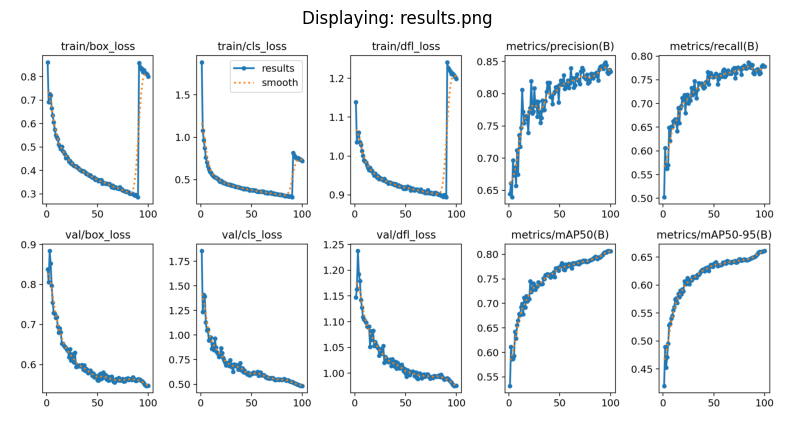

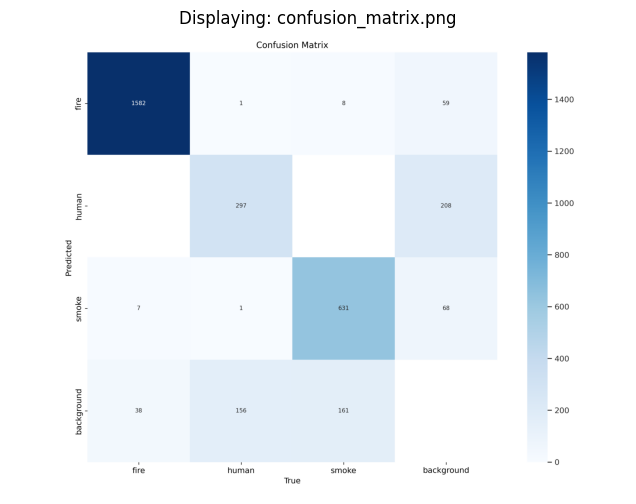

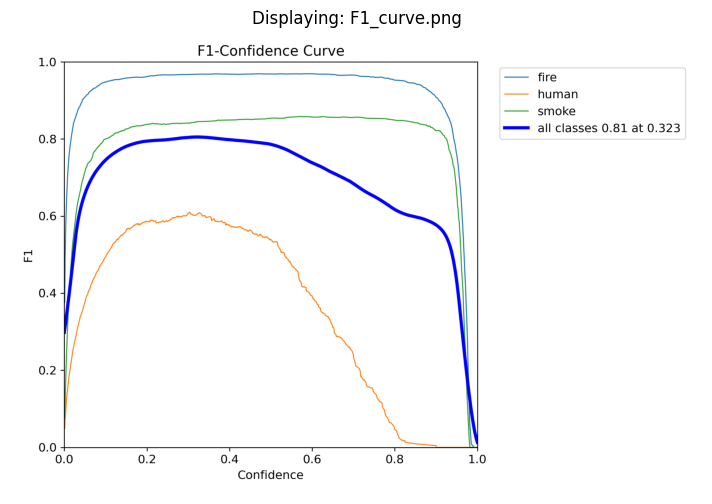

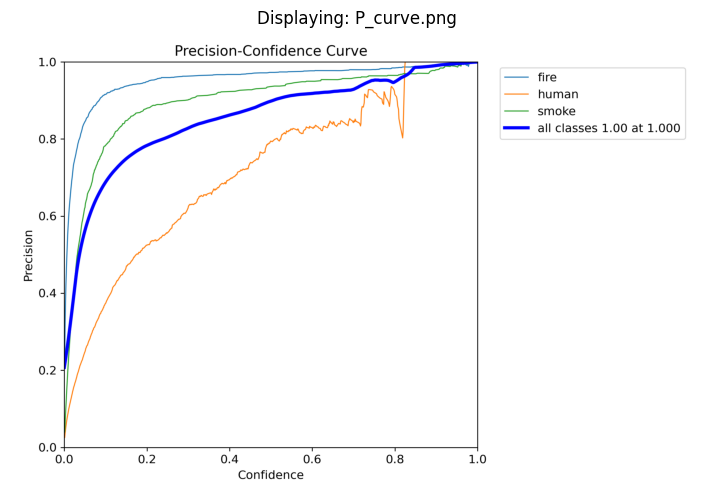

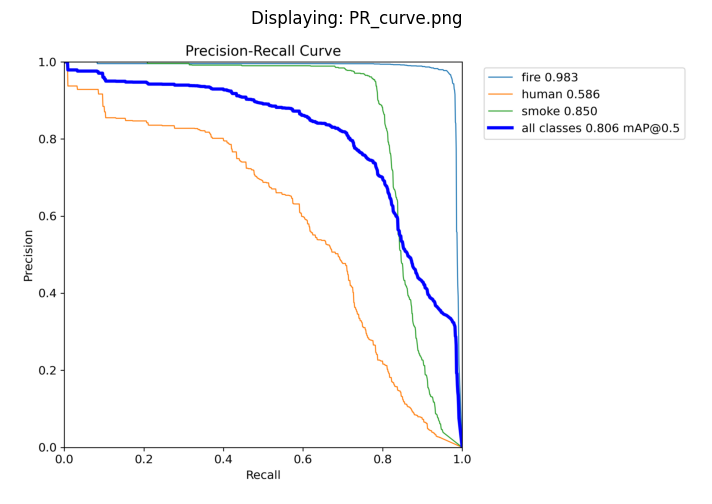

In [7]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Define the directory where the plots are saved
results_dir = "/kaggle/working/yolov8-kaggle-training/fire_smoke_detection"



# List of plot files to display
plot_files = [
    "results.png",                # Overall training results plot
    "confusion_matrix.png",       # Confusion matrix plot
    "F1_curve.png", # Precision-recall curve plot
    "P_curve.png",              # Loss plot
    "PR_curve.png",             # Train loss plot
]

# Iterate over each plot file and display it using matplotlib
for plot_file in plot_files:
    plot_path = os.path.join(results_dir, plot_file)
    
    # Check if the plot file exists
    if os.path.exists(plot_path):
        # Load the plot image
        img = mpimg.imread(plot_path)
        
        # Display the image
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"Displaying: {plot_file}")
        plt.show()
    else:
        print(f"{plot_file} not found in {results_dir}")
